In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import os

infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/melanoma_EMseq_secondlane/EM_seconbatch_result/using_majorlineage/fortox/combining/method1Fract_CD8TIL_pbl_tum_ranked_SM_top100_SM_unique_maxscore_CSxOut.txt_ctrename.txt'
majorlineagefile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/melanoma_EMseq_secondlane/EM_seconbatch_result/using_majorlineage/fortox/combining/method1Fract_BLU2_majorrankedV1_index.txt_inflectionSM.txt_maxscore_CSxOut.txt'

outname=infile+"_"+os.path.basename(majorlineagefile)+"_zscore"

indf=pd.read_csv(infile,sep='\t',index_col='Mixture')
indf.head()

,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,mDC,...,Eosinophil,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,Toxicity
Mixture,,,,,,,,,,,,,,,,,,,,,
irfrestartYUADD-20-4110-auto,3.042793,2.758049,3.417834,3.433857,5.094478,4.632205,4.342432,3.702112,4.518334,3.308991,...,6.182536,3.244714,3.538142,3.438064,7.421293,3.237323,6.267486,2.942280,4.643362,0.0
irfrestartYUBLIT-11-2164-auto,2.789613,3.594492,3.304648,3.470132,5.545010,5.382506,4.622957,3.776820,4.690597,3.627589,...,4.809648,3.577598,3.746580,3.703385,9.274178,3.608610,8.199986,2.740111,4.518322,2.0
irfrestartYUBRET-15-3411-auto,3.355530,3.658127,3.662609,3.878924,4.447035,4.306827,3.987767,3.705169,4.143537,3.324408,...,5.375786,3.644886,3.545147,3.617759,9.845234,3.371908,7.732538,3.326680,4.065404,2.0
irfrestartYUBUMP-14-3166-auto,3.623301,2.921395,3.776146,3.814303,4.433174,4.615345,4.321107,4.249944,4.691179,3.671427,...,5.250385,3.114092,3.008823,3.413882,9.830042,3.248598,8.779211,3.113404,4.779995,0.0
irfrestartYUCEVO-20-4119-auto,3.290976,2.998540,3.554726,3.506960,3.660463,3.941154,3.798624,3.698900,4.122373,3.430846,...,4.848588,3.438098,3.821051,3.539166,12.178349,3.670086,9.871005,2.751290,4.873366,1.0


In [2]:
indf.loc[indf['Toxicity']>2,'irAE']='Severe irAE'
indf.loc[indf['Toxicity']<=2,'irAE']='No severe irAE'

In [3]:
toxdf=indf[indf['Toxicity'].notna()]
toxdf.shape

(33, 24)

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.050e-01 U_stat=1.780e+02


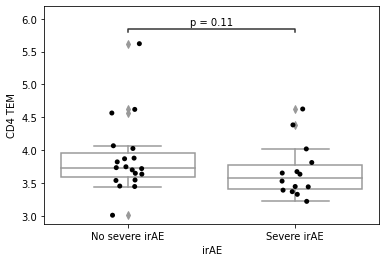

In [4]:
y='CD4 TEM'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdf

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.512e-01 U_stat=1.650e+02


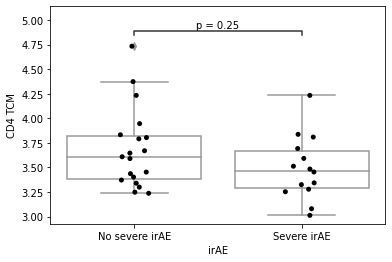

In [5]:
y='CD4 TCM'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdf

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [6]:
majorlineageDF=pd.read_csv(majorlineagefile,sep='\t',index_col='Mixture')
majorlineageDF.head()

,Mono,Bcell,CD4,CD8,NK
Mixture,,,,,
irfrestartYUADD-20-4110-auto,56.385202,10.866405,10.831456,9.825738,12.091199
irfrestartYUBLIT-11-2164-auto,47.249560,13.315469,14.696087,10.522319,14.216564
irfrestartYUBRET-15-3411-auto,43.334562,15.386760,12.320849,11.801398,17.156431
irfrestartYUBUMP-14-3166-auto,42.856376,12.907822,15.502103,12.187656,16.546044
irfrestartYUCEVO-20-4119-auto,38.510852,13.913024,19.045583,11.466375,17.064166


In [7]:
majorlineageDF.shape

(45, 5)

In [8]:
toxdfmerged_with_majorSM=toxdf.merge(majorlineageDF,how='inner',left_index=True,right_index=True)
toxdfmerged_with_majorSM.shape

(33, 29)

In [9]:
toxdfmerged_with_majorSM.head()

,Naive CD4 T,Naive CD8,Naive B,NK_x,Mono_x,Mac (M0),Mac (M1),Mac (M2),iDC,mDC,...,Erythrocyte,Memory B,CD8TIL,Toxicity,irAE,Mono_y,Bcell,CD4,CD8,NK_y
Mixture,,,,,,,,,,,,,,,,,,,,,
irfrestartYUADD-20-4110-auto,3.042793,2.758049,3.417834,3.433857,5.094478,4.632205,4.342432,3.702112,4.518334,3.308991,...,6.267486,2.942280,4.643362,0.0,No severe irAE,56.385202,10.866405,10.831456,9.825738,12.091199
irfrestartYUBLIT-11-2164-auto,2.789613,3.594492,3.304648,3.470132,5.545010,5.382506,4.622957,3.776820,4.690597,3.627589,...,8.199986,2.740111,4.518322,2.0,No severe irAE,47.249560,13.315469,14.696087,10.522319,14.216564
irfrestartYUBRET-15-3411-auto,3.355530,3.658127,3.662609,3.878924,4.447035,4.306827,3.987767,3.705169,4.143537,3.324408,...,7.732538,3.326680,4.065404,2.0,No severe irAE,43.334562,15.386760,12.320849,11.801398,17.156431
irfrestartYUBUMP-14-3166-auto,3.623301,2.921395,3.776146,3.814303,4.433174,4.615345,4.321107,4.249944,4.691179,3.671427,...,8.779211,3.113404,4.779995,0.0,No severe irAE,42.856376,12.907822,15.502103,12.187656,16.546044
irfrestartYUCEVO-20-4119-auto,3.290976,2.998540,3.554726,3.506960,3.660463,3.941154,3.798624,3.698900,4.122373,3.430846,...,9.871005,2.751290,4.873366,1.0,No severe irAE,38.510852,13.913024,19.045583,11.466375,17.064166


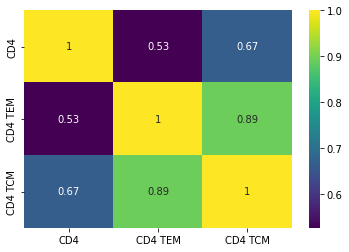

In [10]:
onlythosethreeCT=toxdfmerged_with_majorSM[['CD4','CD4 TEM','CD4 TCM']]
corr = onlythosethreeCT.corr(method='pearson')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='viridis',annot=True)
plt.savefig(infile + '_CD4thosethree_crosscorrelation.pdf', bbox_inches='tight')

In [11]:
toxdfmerged_with_majorSM['CD4TCM_dividedby_CD4']=toxdfmerged_with_majorSM['CD4 TCM']/toxdfmerged_with_majorSM['CD4']
toxdfmerged_with_majorSM['CD4TEM_dividedby_CD4']=toxdfmerged_with_majorSM['CD4 TEM']/toxdfmerged_with_majorSM['CD4']
toxdfmerged_with_majorSM.head()

,Naive CD4 T,Naive CD8,Naive B,NK_x,Mono_x,Mac (M0),Mac (M1),Mac (M2),iDC,mDC,...,CD8TIL,Toxicity,irAE,Mono_y,Bcell,CD4,CD8,NK_y,CD4TCM_dividedby_CD4,CD4TEM_dividedby_CD4
Mixture,,,,,,,,,,,,,,,,,,,,,
irfrestartYUADD-20-4110-auto,3.042793,2.758049,3.417834,3.433857,5.094478,4.632205,4.342432,3.702112,4.518334,3.308991,...,4.643362,0.0,No severe irAE,56.385202,10.866405,10.831456,9.825738,12.091199,0.298882,0.326654
irfrestartYUBLIT-11-2164-auto,2.789613,3.594492,3.304648,3.470132,5.545010,5.382506,4.622957,3.776820,4.690597,3.627589,...,4.518322,2.0,No severe irAE,47.249560,13.315469,14.696087,10.522319,14.216564,0.245549,0.254937
irfrestartYUBRET-15-3411-auto,3.355530,3.658127,3.662609,3.878924,4.447035,4.306827,3.987767,3.705169,4.143537,3.324408,...,4.065404,2.0,No severe irAE,43.334562,15.386760,12.320849,11.801398,17.156431,0.273675,0.287736
irfrestartYUBUMP-14-3166-auto,3.623301,2.921395,3.776146,3.814303,4.433174,4.615345,4.321107,4.249944,4.691179,3.671427,...,4.779995,0.0,No severe irAE,42.856376,12.907822,15.502103,12.187656,16.546044,0.209559,0.194091
irfrestartYUCEVO-20-4119-auto,3.290976,2.998540,3.554726,3.506960,3.660463,3.941154,3.798624,3.698900,4.122373,3.430846,...,4.873366,1.0,No severe irAE,38.510852,13.913024,19.045583,11.466375,17.064166,0.192700,0.200627


No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.321e-02 U_stat=1.890e+02


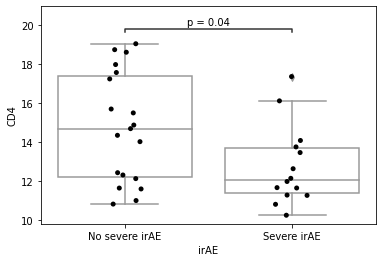

In [12]:
y='CD4'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.066e-02 U_stat=8.100e+01


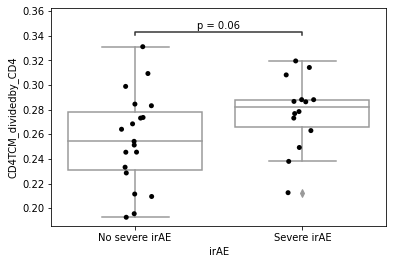

In [13]:
y='CD4TCM_dividedby_CD4'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.306e-01 U_stat=9.100e+01


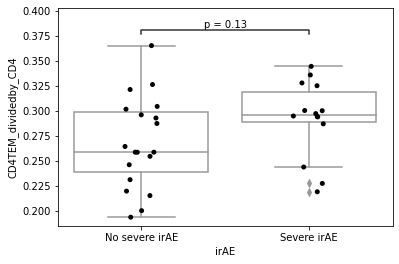

In [14]:
y='CD4TEM_dividedby_CD4'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [15]:
col='CD4TEM_dividedby_CD4'
toxdfmerged_with_majorSM[col+" (z-score)"] = (toxdfmerged_with_majorSM[col] - toxdfmerged_with_majorSM[col].mean())/toxdfmerged_with_majorSM[col].std(ddof=0)


col='CD4TCM_dividedby_CD4'
toxdfmerged_with_majorSM[col+" (z-score)"] = (toxdfmerged_with_majorSM[col] - toxdfmerged_with_majorSM[col].mean())/toxdfmerged_with_majorSM[col].std(ddof=0)

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.306e-01 U_stat=9.100e+01


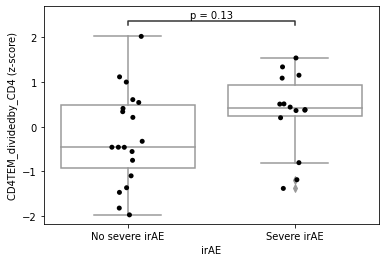

In [16]:
y='CD4TEM_dividedby_CD4 (z-score)'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.066e-02 U_stat=8.100e+01


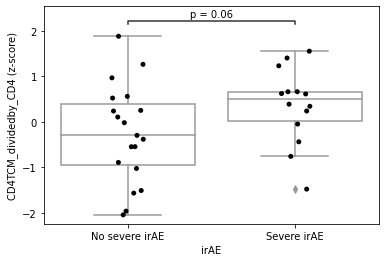

In [17]:
y='CD4TCM_dividedby_CD4 (z-score)'
x='irAE'
order=['No severe irAE','Severe irAE']

plottingdf=toxdfmerged_with_majorSM

ax=sns.boxplot(x=x, y=y, data=plottingdf,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=plottingdf,order=order,color='black')
ax.set_ylabel(y)
add_stat_annotation(ax,x=x, y=y, data=plottingdf,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outname + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

In [18]:
toxdfmerged_with_majorSM.to_csv(outname+".txt",sep='\t')